*This notebook is dedicated to the tenth chapter. Exercises itself could be found at page 431.*  


Train a deep MLP on the MNIST dataset (you can load it using
keras.datasets.mnist.load_data(). See if you can get over
98% precision. Try searching for the optimal learning rate by
using the approach presented in this chapter (i.e., by growing the
learning rate exponentially, plotting the error, and finding the
point where the error shoots up). Try adding all the bells and
whistles—save checkpoints, use early stopping, and plot learning
curves using TensorBoard.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
keras.datasets.mnist.load_data()
mnist = keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [8]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("mnist_nn.h5", save_best_only=True)

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.6177 - accuracy: 0.8442 - val_loss: 0.3092 - val_accuracy: 0.9160
Epoch 2/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.2851 - accuracy: 0.9189 - val_loss: 0.2337 - val_accuracy: 0.9354
Epoch 3/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.2313 - accuracy: 0.9335 - val_loss: 0.2022 - val_accuracy: 0.9434
Epoch 4/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.1977 - accuracy: 0.9434 - val_loss: 0.1741 - val_accuracy: 0.9514
Epoch 5/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.1732 - accuracy: 0.9506 - val_loss: 0.1569 - val_accuracy: 0.9576
Epoch 6/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.1539 - accuracy: 0.9554 - val_loss: 0.1435 - val_accuracy: 0.9604
Epoch 7/30
55000/55000 [==============================] -

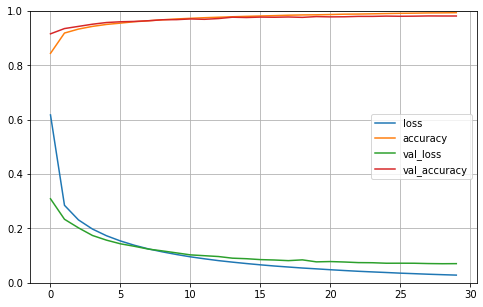

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 14.1104 - accuracy: 0.9732


[14.110424702991908, 0.9732]

In [12]:
model.save("mnist_nn.h5")